<a href="https://colab.research.google.com/github/ChetanAIML/Capstone/blob/main/Human_Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

image_name    0
width         0
height        0
x0            0
y0            0
x1            0
y1            0
dtype: int64
             width       height           x0           y0           x1  \
count  3350.000000  3350.000000  3350.000000  3350.000000  3350.000000   
mean    967.967164   829.165373   367.840597   152.120896   614.433134   
std     651.959869   604.168252   322.675542   171.743790   451.800098   
min     150.000000   115.000000     1.000000     1.000000    49.000000   
25%     612.000000   433.000000   167.000000    52.000000   340.000000   
50%     800.000000   683.000000   294.000000   104.000000   506.000000   
75%    1200.000000  1024.000000   474.750000   197.000000   773.000000   
max    8192.000000  6680.000000  5212.000000  2375.000000  6815.000000   

                y1  
count  3350.000000  
mean    390.987761  
std     314.378134  
min      48.000000  
25%     203.000000  
50%     312.000000  
75%     480.750000  
max    4471.000000  


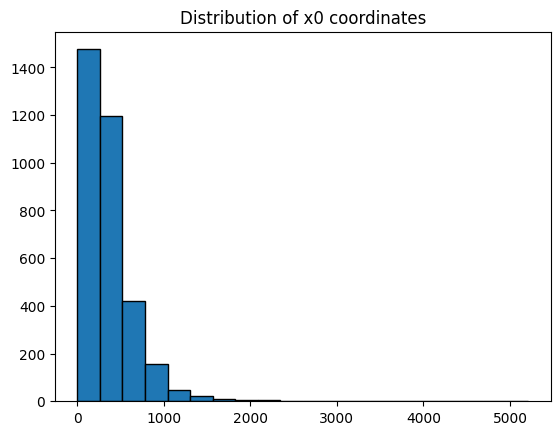

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Step 1: Exploratory Data Analysis (EDA)

# Load the CSV file containing facial bounding box coordinates
df = pd.read_csv('faces.csv')

# Check for missing values
print(df.isnull().sum())

# Descriptive statistics of bounding box coordinates
print(df.describe())

# Visualize the distribution of bounding box coordinates
plt.hist(df['x0'], bins=20, edgecolor='black')
plt.title('Distribution of x0 coordinates')
plt.show()


In [2]:
df

,image_name,width,height,x0,y0,x1,y1
0,00001722.jpg,1333,2000,490,320,687,664
1,00001044.jpg,2000,1333,791,119,1200,436
2,00001050.jpg,667,1000,304,155,407,331
3,00001736.jpg,626,417,147,14,519,303
4,00003121.jpg,626,418,462,60,599,166
...,...,...,...,...,...,...,...
3345,00002232.jpg,620,349,4,36,186,158
3346,00002232.jpg,620,349,122,103,344,248
3347,00002232.jpg,620,349,258,118,541,303
3348,00002232.jpg,620,349,215,11,362,108


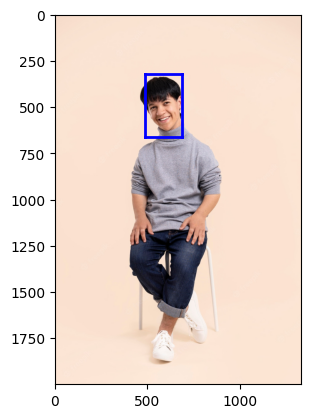

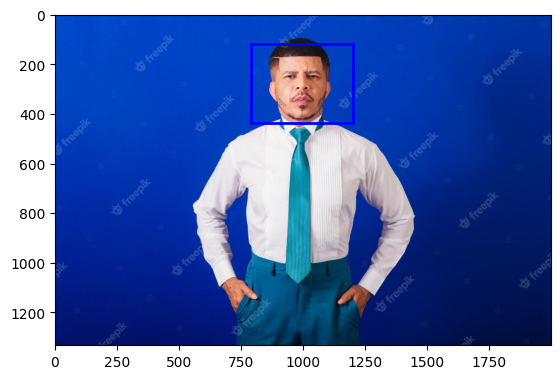

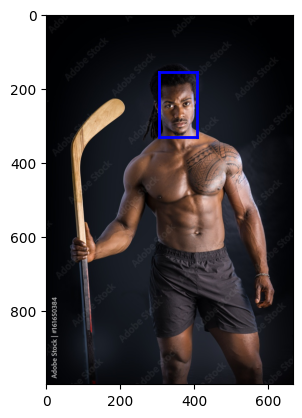

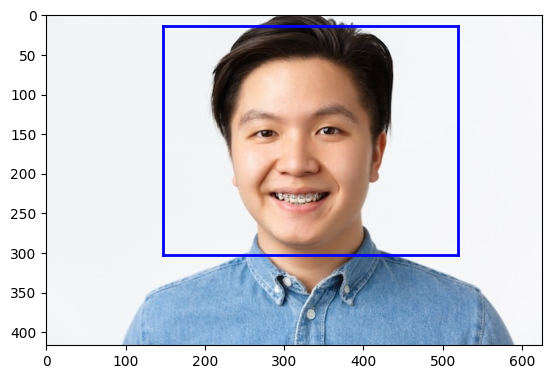

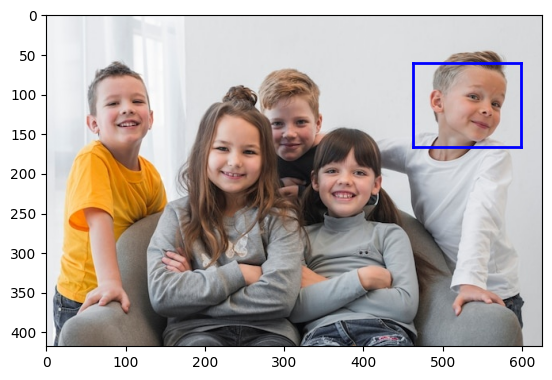

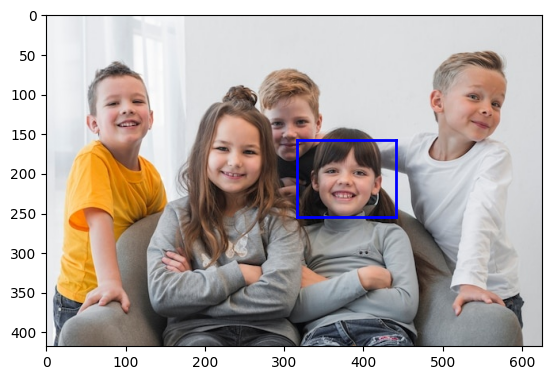

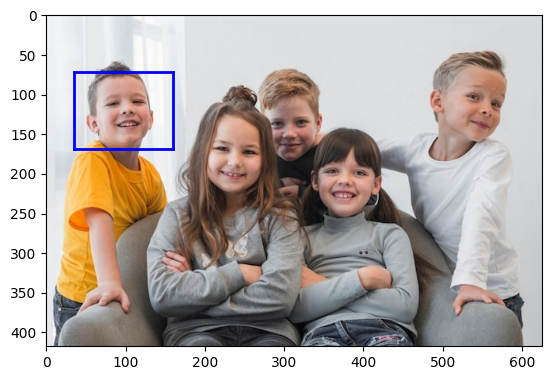

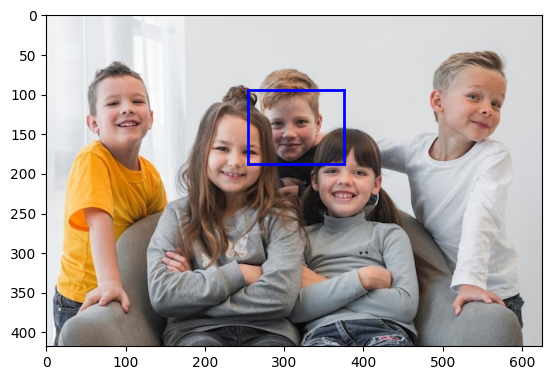

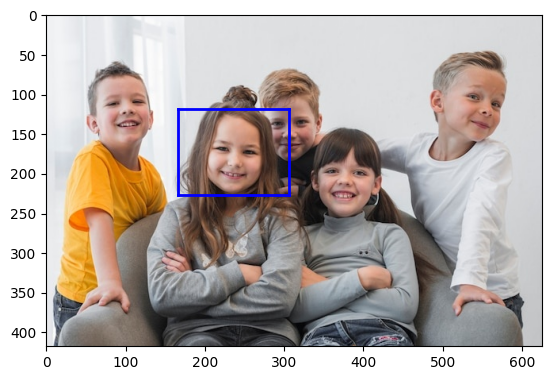

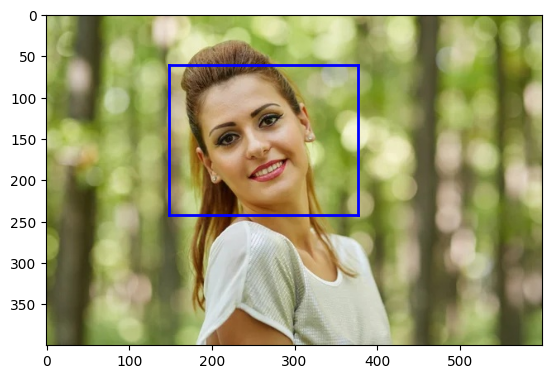

ValueError: ignored

In [8]:

# Visualize images with bounding boxes
for i in range(10):
    image_path ='images/' + df.loc[i, 'image_name']
    image = plt.imread(image_path)
    x0, y0, x1, y1 = df.loc[i, ['x0', 'y0', 'x1', 'y1']]
    plt.imshow(image)
    plt.plot([x0, x1], [y0, y0], 'b-', linewidth=2)
    plt.plot([x0, x0], [y0, y1], 'b-', linewidth=2)
    plt.plot([x1, x1], [y0, y1], 'b-', linewidth=2)
    plt.plot([x0, x1], [y1, y1], 'b-', linewidth=2)
    plt.show()

# Step 2: Split Dataset into Train, Test, and Validation Sets

# Divide the data into training, testing, and validation sets
train_data = df.sample(frac=0.7)
test_data = df.drop(train_data.index)
val_data = test_data.sample(frac=0.25)
test_data = test_data.drop(val_data.index)

# Step 3: Train, Evaluate, and Plot Accuracy and Loss

# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_dataframe(train_data, target_size=(224, 224), batch_size=32, class_mode='rectangles')

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_data)

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Step 4: Face Detection and Bounding Box Drawing

# Load the image to detect faces in
image = plt.imread('test_image.jpg')

# Preprocess the image
image = tf.image.resize(image, (224, 224))
image = image.astype('float32') / 255.0

# Make predictions
predictions = model.predict(np.expand_dims(image, axis=0))[0]

# Draw bounding boxes on the image
for prediction in predictions:
    x0, y0, x1, y1 = prediction
    x0, y0, x1, y1 = int(x0), int(y0), int(x1), int(y1)
    plt.plot([x0, x1], [y0, y0], 'b-', linewidth=2)
    plt.plot([x0, x0], [y0, y1], 'b-', linewidth=2)
    plt.plot([x1, x1], [y0, y1], 'b-', linewidth=2)
    plt.plot([x0, x1], [y1, y1], 'b-', linewidth=2)
    plt.imshow(image)
    plt.show()
